In [18]:
!pip install pandas yfinance talib pynance matplotlib


ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib


In [22]:
import pandas as pd
import yfinance as yf
#import talib as ta
import pynance as pn
import matplotlib.pyplot as plt


In [23]:
import os

# Load all CSV files from the directory
directory = '/home/kali/Desktop/git/Financial-News-and-Stock-Price-Integration/Data/yfinance_data'
stock_data = {}

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        stock_name = filename.split('.')[0]
        file_path = os.path.join(directory, filename)
        stock_data[stock_name] = pd.read_csv(file_path, parse_dates=['Date'])

# Display the first few rows of one stock to check
stock_name_example = list(stock_data.keys())[0]
stock_data[stock_name_example].head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [24]:
# Example with one stock, you can loop over all if needed
df = stock_data[stock_name_example]

# Calculate 50-day and 200-day Moving Averages
df['MA50'] = ta.SMA(df['Close'], timeperiod=50)
df['MA200'] = ta.SMA(df['Close'], timeperiod=200)

# Calculate RSI (Relative Strength Index)
df['RSI'] = ta.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.MACD(df['Close'], 
                                                          fastperiod=12, 
                                                          slowperiod=26, 
                                                          signalperiod=9)

# Display the modified DataFrame with indicators
df.tail()


NameError: name 'ta' is not defined

KeyError: 'MA50'

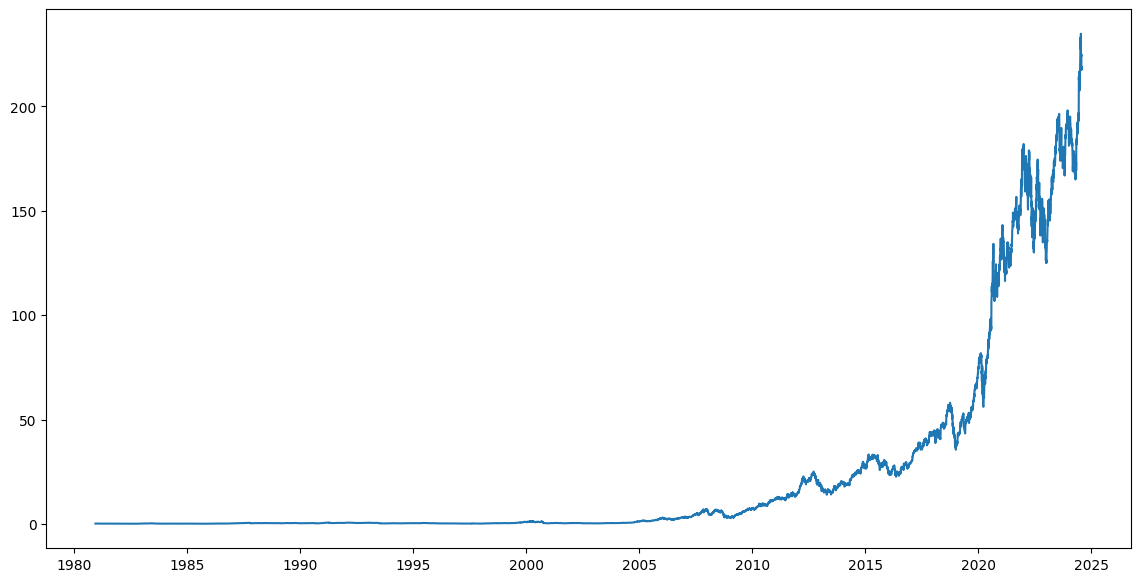

In [25]:
# Plotting Close Price with Moving Averages
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA50'], label='50-day MA', linestyle='--')
plt.plot(df['Date'], df['MA200'], label='200-day MA', linestyle='--')
plt.title(f'{stock_name_example} Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting RSI
plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title(f'{stock_name_example} RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plotting MACD
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
plt.plot(df['Date'], df['MACD_signal'], label='MACD Signal', color='red')
plt.bar(df['Date'], df['MACD_hist'], label='MACD Histogram', color='gray')
plt.title(f'{stock_name_example} MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()
